In [1]:
from datetime import datetime
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import numpy as np


https://github.com/SAP-BI/IntroBI-Paris-Descartes


In [2]:
df = pd.read_csv("spotify-2023.csv", encoding="ascii")
print(df.shape)
df.head()

(953, 24)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Step 1 Data cleansing

instead of a column Date with datetime and a column Year-Quarter we want 4 columns
- day
- month
- quarter 
- year 

In [4]:
df.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [5]:
df['Date']

0         12/9/2016  12:00:00 AM
1        11/23/2016  12:00:00 AM
2        11/26/2016  12:00:00 AM
3        12/29/2016  12:00:00 AM
4         12/2/2016  12:00:00 AM
                  ...           
16312     3/19/2014  12:00:00 AM
16313      3/7/2014  12:00:00 AM
16314      3/9/2014  12:00:00 AM
16315     2/15/2014  12:00:00 AM
16316      3/7/2014  12:00:00 AM
Name: Date, Length: 16317, dtype: object

In [6]:
%%time
date=pd.to_datetime(df['Date'], format="%m/%d/%Y %H:%M:%S %p")
date

Wall time: 8 ms


0       2016-12-09 12:00:00
1       2016-11-23 12:00:00
2       2016-11-26 12:00:00
3       2016-12-29 12:00:00
4       2016-12-02 12:00:00
                ...        
16312   2014-03-19 12:00:00
16313   2014-03-07 12:00:00
16314   2014-03-09 12:00:00
16315   2014-02-15 12:00:00
16316   2014-03-07 12:00:00
Name: Date, Length: 16317, dtype: datetime64[ns]

In [7]:
%%time

date=pd.to_datetime(df['Date'], format="%m/%d/%Y %H:%M:%S %p")
year =date.dt.year
month = date.dt.month
day = date.dt.day

df.drop(columns=["Date"], inplace=True)
df["Day"] = day
df["Month"]= month
df["Year"] = year

Wall time: 13 ms


In [8]:
df.head()

,Category,Lines,City,Country,Manager,Quantity sold,Sales Revenue,Gross Margin,Discount,Customer Satisfaction,Number of Issues reported,Comments,GMR,Year-Quarter,Day,Month,Year
0,Jewelry,Accessories,Nairobi,Kenya,Anne Coke,50.00,123.00,47.00,9.84,0.95,19.0,Customer service,0.38,2016-Q4,9,12,2016
1,"Belts,bags,wallets",Accessories,Nairobi,Kenya,Anne Coke,"2,100.00","7,498.00","2,841.00",999.70,0.85,25.0,Other / unknown,0.38,2016-Q4,23,11,2016
2,Samples,Accessories,Nairobi,Kenya,Anne Coke,"1,350.00","3,142.00","1,049.00",293.23,0.91,17.0,Behaviour of personnel,0.33,2016-Q4,26,11,2016
3,"Hats,gloves,scarves",Accessories,Nairobi,Kenya,Anne Coke,100.00,262.00,84.00,34.90,0.85,12.0,Item defect / bad quality,0.32,2016-Q4,29,12,2016
4,Lounge wear,Accessories,Nairobi,Kenya,Anne Coke,450.00,"1,092.00",262.00,72.80,0.81,11.0,Item defect / bad quality,0.24,2016-Q4,2,12,2016


In [9]:

tmp =df["Year-Quarter"].str.split("-", expand=True)
tmp 



,0,1
0,2016,Q4
1,2016,Q4
2,2016,Q4
3,2016,Q4
4,2016,Q4
...,...,...
16312,2014,Q1
16313,2014,Q1
16314,2014,Q1
16315,2014,Q1


In [48]:
tmp.iloc[:,1]

0        Q4
1        Q4
2        Q4
3        Q4
4        Q4
         ..
16312    Q1
16313    Q1
16314    Q1
16315    Q1
16316    Q1
Name: 1, Length: 16317, dtype: object

In [10]:

tmp =df["Year-Quarter"].str.split("-", expand=True)
tmp 

df["Quarter"]= tmp.iloc[:,1]
df.drop(columns=["Year-Quarter"], inplace=True)
df.head()

,Category,Lines,City,Country,Manager,Quantity sold,Sales Revenue,Gross Margin,Discount,Customer Satisfaction,Number of Issues reported,Comments,GMR,Day,Month,Year,Quarter
0,Jewelry,Accessories,Nairobi,Kenya,Anne Coke,50.00,123.00,47.00,9.84,0.95,19.0,Customer service,0.38,9,12,2016,Q4
1,"Belts,bags,wallets",Accessories,Nairobi,Kenya,Anne Coke,"2,100.00","7,498.00","2,841.00",999.70,0.85,25.0,Other / unknown,0.38,23,11,2016,Q4
2,Samples,Accessories,Nairobi,Kenya,Anne Coke,"1,350.00","3,142.00","1,049.00",293.23,0.91,17.0,Behaviour of personnel,0.33,26,11,2016,Q4
3,"Hats,gloves,scarves",Accessories,Nairobi,Kenya,Anne Coke,100.00,262.00,84.00,34.90,0.85,12.0,Item defect / bad quality,0.32,29,12,2016,Q4
4,Lounge wear,Accessories,Nairobi,Kenya,Anne Coke,450.00,"1,092.00",262.00,72.80,0.81,11.0,Item defect / bad quality,0.24,2,12,2016,Q4


In [11]:
df.columns

Index(['Category', 'Lines', 'City', 'Country', 'Manager', 'Quantity sold',
       'Sales Revenue', 'Gross Margin', 'Discount', 'Customer Satisfaction',
       'Number of Issues reported', 'Comments', 'GMR', 'Day', 'Month', 'Year',
       'Quarter'],
      dtype='object')

# Check columns datatype

In [12]:
df.dtypes

Category                      object
Lines                         object
City                          object
Country                       object
Manager                       object
Quantity sold                 object
Sales Revenue                 object
Gross Margin                  object
Discount                      object
Customer Satisfaction        float64
Number of Issues reported    float64
Comments                      object
GMR                          float64
Day                            int64
Month                          int64
Year                           int64
Quarter                       object
dtype: object

In [13]:
for col in df.loc[:,"Quantity sold":"Gross Margin"]:
    df[col] = pd.to_numeric(df[col].str.replace(',',""))
   
df.dtypes
#pd.to_numeric(df["Sales Revenue"].str.replace(',',""))

Category                      object
Lines                         object
City                          object
Country                       object
Manager                       object
Quantity sold                float64
Sales Revenue                float64
Gross Margin                 float64
Discount                      object
Customer Satisfaction        float64
Number of Issues reported    float64
Comments                      object
GMR                          float64
Day                            int64
Month                          int64
Year                           int64
Quarter                       object
dtype: object

# First analytics
display the sales per year and then the sales per quarter and year

In [14]:
df.groupby('Year', as_index=False).sum()

,Year,Quantity sold,Sales Revenue,Gross Margin,Customer Satisfaction,Number of Issues reported,GMR,Day,Month
0,2014,13364600.0,41584162.00,19065167.97,4891.14,100249.0,2335.88,95313,35798
1,2015,20037000.0,65593018.50,25904781.83,3909.22,79743.0,1682.48,74879,33429
2,2016,22350078.0,76203216.01,29878872.58,5477.61,125578.0,2060.54,107767,41399


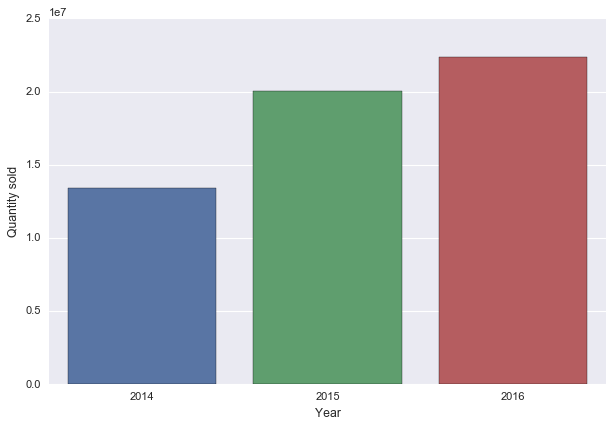

In [49]:
#import seaborn as sns

df2 = df.groupby('Year', as_index=False).sum()

ax = sns.barplot(x="Year", y="Quantity sold", data=df2)
plt.show()

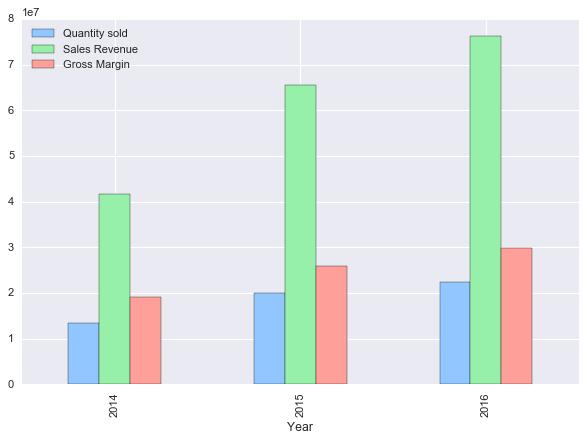

In [51]:
matplotlib.style.use('seaborn-pastel')
df2.iloc[:,:4].plot(x= "Year", kind="bar", legend=True)
plt.show()

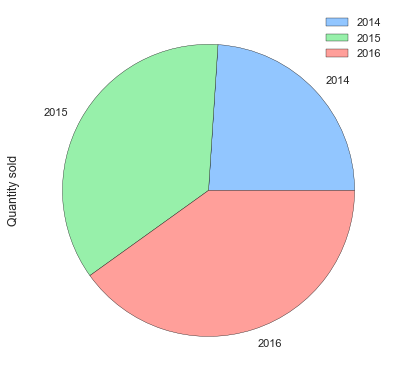

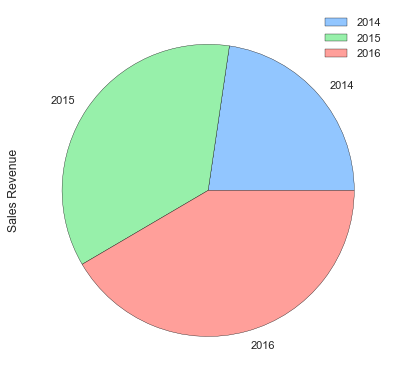

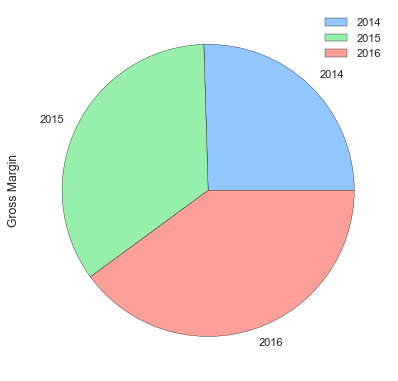

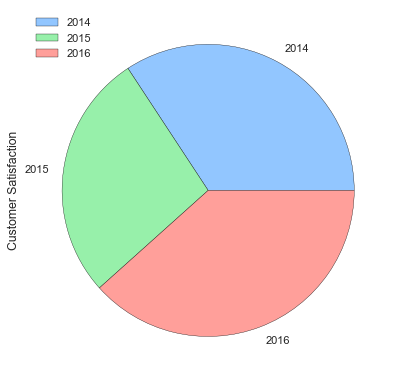

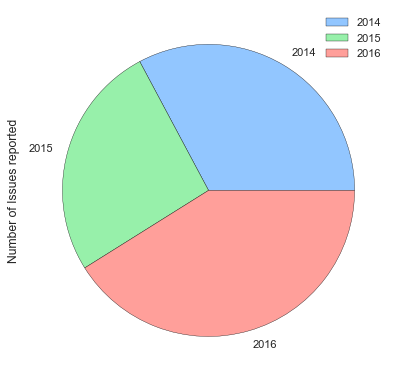

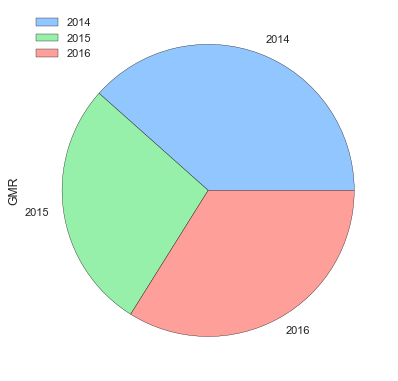

In [57]:
matplotlib.style.use('seaborn-pastel')

for col in ['Quantity sold', 'Sales Revenue', 'Gross Margin',
       'Customer Satisfaction', 'Number of Issues reported', 'GMR']:
    df2.plot(x= "Year", y= col, kind="pie", legend=True, labels=df2.Year)
plt.show()

In [18]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [19]:
df3 = df.groupby(['Year', 'Quarter'], as_index=False).sum()
df3

,Year,Quarter,Quantity sold,Sales Revenue,Gross Margin,Customer Satisfaction,Number of Issues reported,GMR,Day,Month
0,2014,Q1,4560700.0,13320335.75,5845700.13,1405.35,28817.0,565.41,27612,3235
1,2014,Q2,3621900.0,11484461.75,5425461.22,1003.26,20667.0,523.40,19211,5754
2,2014,Q3,2575450.0,7331191.75,3005097.49,1232.28,25332.0,555.75,23669,11233
3,2014,Q4,2606550.0,9448172.75,4788909.13,1250.25,25433.0,691.32,24821,15576
4,2015,Q1,5295900.0,16158705.00,6044098.47,644.13,13110.0,237.55,12227,1507
5,2015,Q2,4301350.0,13868042.25,5535410.64,672.41,13889.0,298.37,12872,3814
6,2015,Q3,4828900.0,14776717.25,5415041.05,1254.94,25547.0,522.30,23917,11370
7,2015,Q4,5610850.0,20789554.00,8910231.67,1337.74,27197.0,624.26,25863,16738
8,2016,Q1,5663150.0,19049437.00,8485988.36,1479.89,30399.0,570.70,28705,3424
9,2016,Q2,5726400.0,20327666.00,8365985.08,1129.19,27359.0,508.67,22278,6560


<AxesSubplot:xlabel='Year-Quarter'>

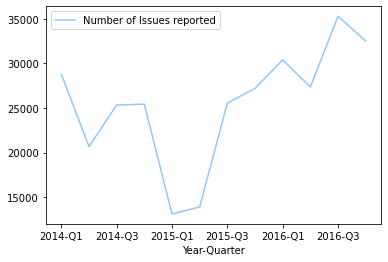

In [20]:
df3b = df3.copy()
df3b["Year-Quarter"]= df3b["Year"].astype(str) + "-" + df3b["Quarter"]
df3b
df3b.plot(x= "Year-Quarter", y= "Number of Issues reported", kind="line", legend=True)

# Does the sum of customer satisfaction means something?

In [61]:
df4 = df.groupby(['Year', 'Month'], as_index=False).agg("mean")
df4.head()


,Year,Month,Quantity sold,Sales Revenue,Gross Margin,Customer Satisfaction,Number of Issues reported,GMR,Day
0,2014,1,2737.592593,8146.292593,3600.565370,0.877370,17.937037,0.354463,17.403704
1,2014,2,3184.453782,9419.027311,4124.154622,0.881408,18.023109,0.352395,17.699580
2,2014,3,2696.385542,7638.348967,3336.139811,0.881274,18.161790,0.355009,16.848537
3,2014,4,2874.731183,9149.564516,4353.566882,0.880484,18.107527,0.459086,16.948925
4,2014,5,3535.593220,11300.092514,5324.510339,0.876384,18.240113,0.461130,16.014124


In [62]:
## rewrite to take into account col& and col2
def new_column_concat(df, col1, col2):
    dfb = df.copy()
    dfb["Year-Month"]= dfb["Year"].astype(str) + "-" + dfb["Month"].astype(str)
    return dfb

#new_column_concat(df4, "Year", "Month").plot(x= "Year-Month", y= "Customer Satisfaction", kind="line", legend=True)

<AxesSubplot:xlabel='Year-Month'>

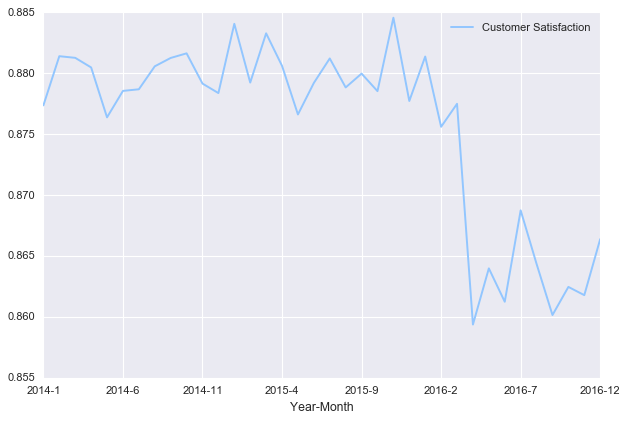

In [63]:
new_column_concat(df4, "Year", "Month").plot(x= "Year-Month", y= "Customer Satisfaction", kind="line", legend=True)

## Use different aggregation in the same dataset

In [24]:

aggregations = {"Customer Satisfaction":["sum"], 
                "Number of Issues reported":["mean", "sum"]}

df5 = df.groupby(['Year', 'Month'], as_index=False).agg(aggregations)
df5

Year Month Customer Satisfaction Number of Issues reported         
                                 sum                      mean      sum
0   2014     1                473.78                 17.937037   9686.0
1   2014     2                419.55                 18.023109   8579.0
2   2014     3                512.02                 18.161790  10552.0
3   2014     4                327.54                 18.107527   6736.0
4   2014     5                310.24                 18.240113   6457.0
5   2014     6                365.48                 17.966346   7474.0
6   2014     7                402.44                 18.272926   8369.0
7   2014     8                397.14                 18.095344   8161.0
8   2014     9                432.70                 17.926680   8802.0
9   2014    10                477.85                 17.758303   9625.0
10  2014    11                344.63                 17.885204   7011.0
11  2014    12                427.77                 18.063655   8797.0
12  2015     1                208.64                 17.881356   4220.0
13  2015     2                185.52                 18.260664   3853.0
14  2015     3                249.97                 17.798587   5037.0
15  2015     4                243.93                 18.335740   5079.0
16  2015     5                194.61                 17.765766   3944.0
17  2015     6                233.87                 18.293233   4866.0
18  2015     7                439.73                 17.907816   8936.0
19  2015     8                409.54                 17.849785   8318.0
20  2015     9                405.67                 17.989154   8293.0
21  2015    10                455.96                 17.994220   9339.0
22  2015    11                410.44                 17.696121   8211.0
23  2015    12                471.34                 17.964618   9647.0
24  2016     1                505.03                 17.893543  10253.0
25  2016     2                424.67                 18.068041   8763.0
26  2016     3                550.19                 18.154705  11383.0
27  2016     4                405.62                 21.067797   9944.0
28  2016     5                312.76                 21.146409   7655.0
29  2016     6                410.81                 20.461216   9760.0
30  2016     7                518.64                 20.438861  12202.0
31  2016     8                429.58                 20.185111  10032.0
32  2016     9                535.01                 21.006431  13066.0
33  2016    10                477.80                 20.440433  11324.0
34  2016    11                411.93                 20.261506   9685.0
35  2016    12                495.57                 20.124126  11511.0

In [25]:
df5.loc[:,("Number of Issues reported", "mean")]


0     17.937037
1     18.023109
2     18.161790
3     18.107527
4     18.240113
5     17.966346
6     18.272926
7     18.095344
8     17.926680
9     17.758303
10    17.885204
11    18.063655
12    17.881356
13    18.260664
14    17.798587
15    18.335740
16    17.765766
17    18.293233
18    17.907816
19    17.849785
20    17.989154
21    17.994220
22    17.696121
23    17.964618
24    17.893543
25    18.068041
26    18.154705
27    21.067797
28    21.146409
29    20.461216
30    20.438861
31    20.185111
32    21.006431
33    20.440433
34    20.261506
35    20.124126
Name: (Number of Issues reported, mean), dtype: float64

<AxesSubplot:xlabel='Year-Month'>

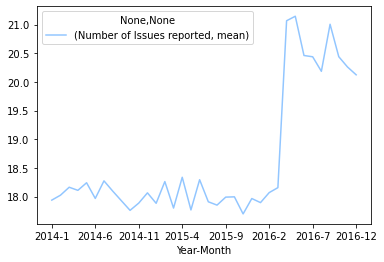

In [26]:
new_column_concat(df5, "Year", "Month").plot(x= "Year-Month", y= ("Number of Issues reported", "mean"), kind="line", legend=True)

## #City by country
get the number cities for each country and the average sales per city for each country

In [27]:
# beware NULL behavior
aggregations = { 
                "City":"count",
}

df6 = df.groupby(['Country'], as_index=False).agg(aggregations)
df6

,Country,City
0,Argentina,312
1,Australia,625
2,Belgium,307
3,Brasil,625
4,Chile,304
5,China,165
6,Colombia,308
7,Denmark,293
8,Egypt,614
9,France,1107


In [28]:
%%time
aggregations = { 
                "City":pd.Series.nunique,
                "Sales Revenue": "sum"
}

df6 = df.groupby(['Country'], as_index=False).agg(aggregations)
#pd.DataFrame.nunique(df6)
df6

Wall time: 13 ms


,Country,City,Sales Revenue
0,Argentina,1,3268926.00
1,Australia,2,7429334.00
2,Belgium,1,1236306.00
3,Brasil,2,4488046.00
4,Chile,1,1619937.00
5,China,1,1540517.00
6,Colombia,1,1813740.00
7,Denmark,1,1127633.00
8,Egypt,2,6110953.00
9,France,4,14076212.51


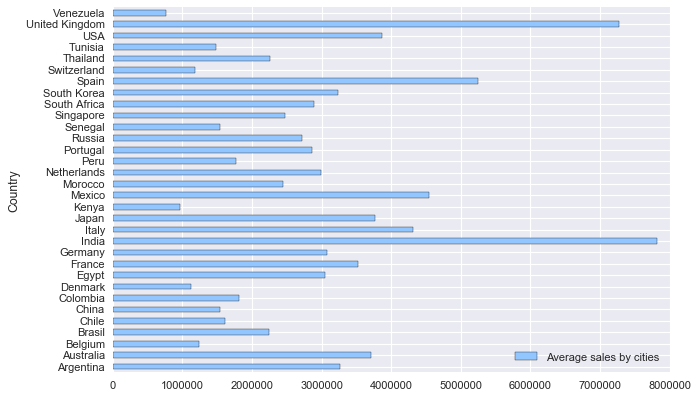

In [64]:
matplotlib.style.use('seaborn-pastel')

df6["Average sales by cities"] = df6["Sales Revenue"]/df6["City"]
df6.plot(x= "Country", y= "Average sales by cities", kind="barh", legend=True)
plt.show()

C:\Users\I053131\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


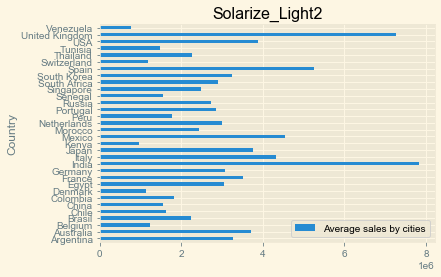

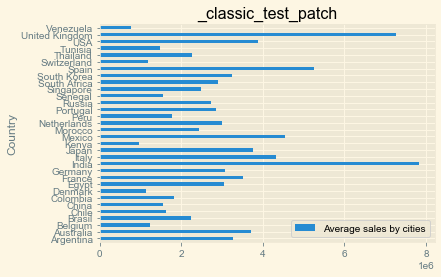

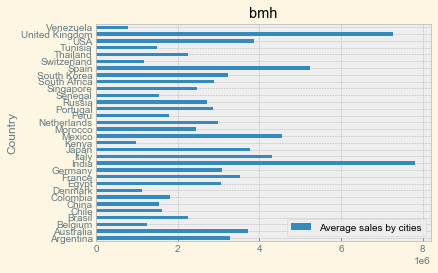

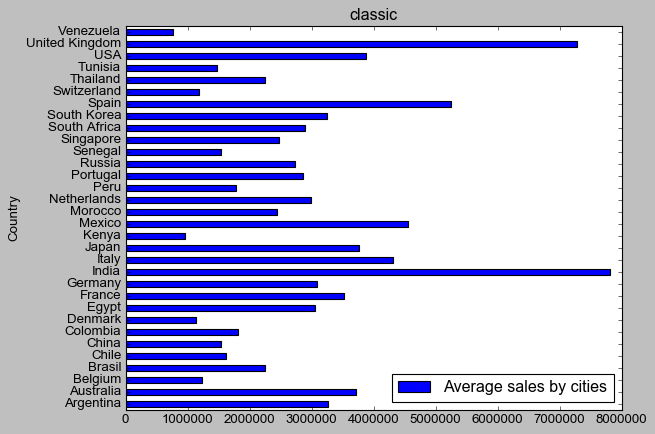

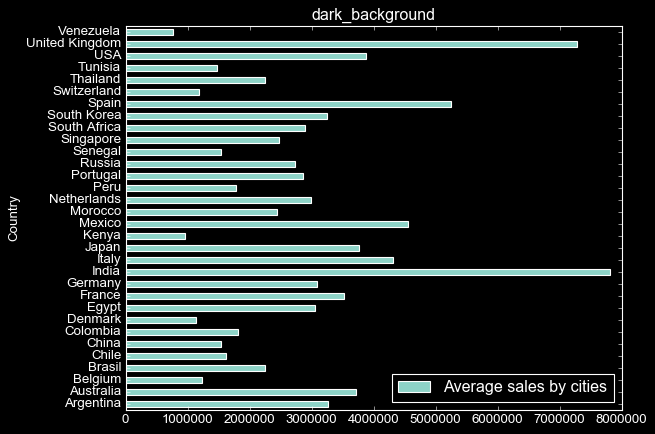

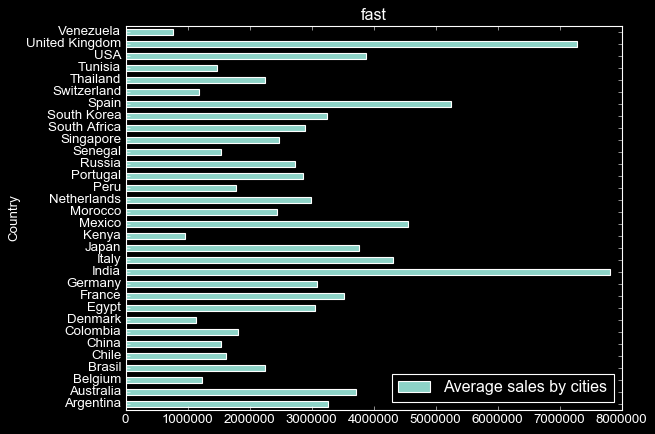

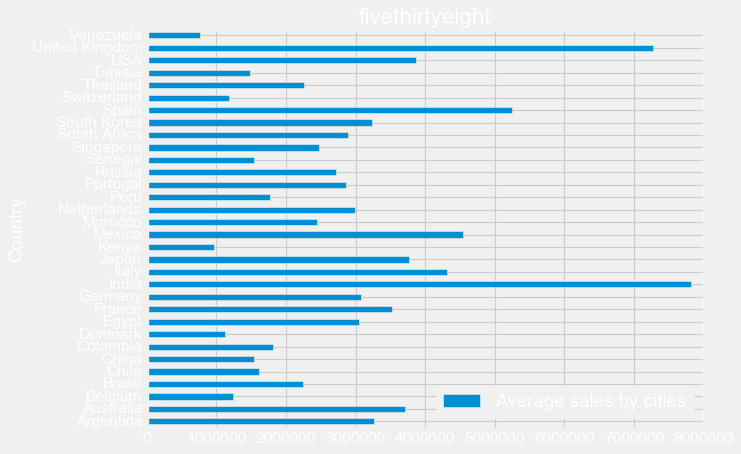

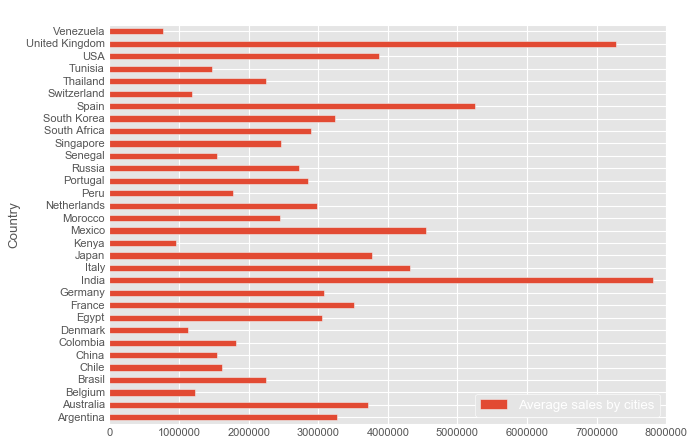

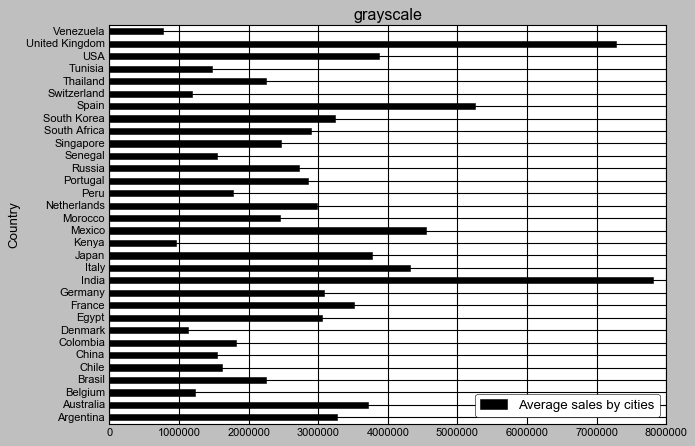

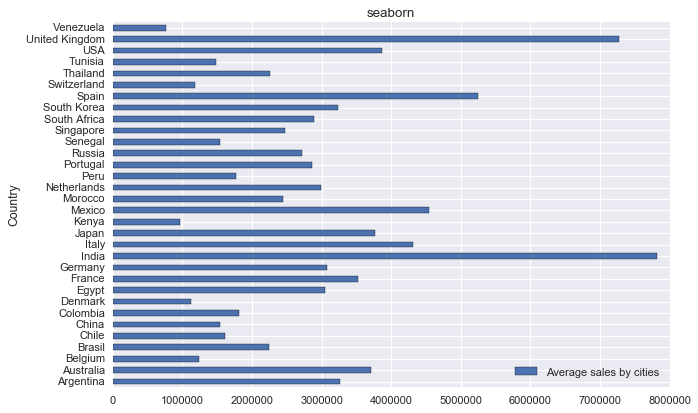

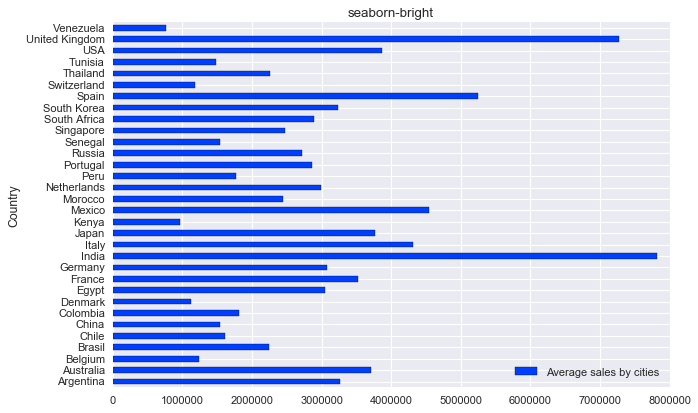

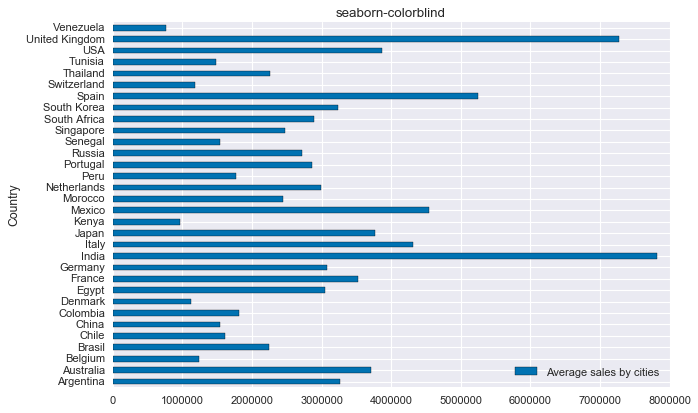

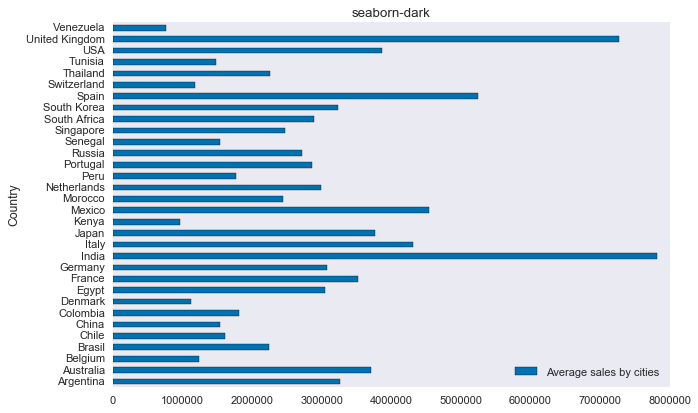

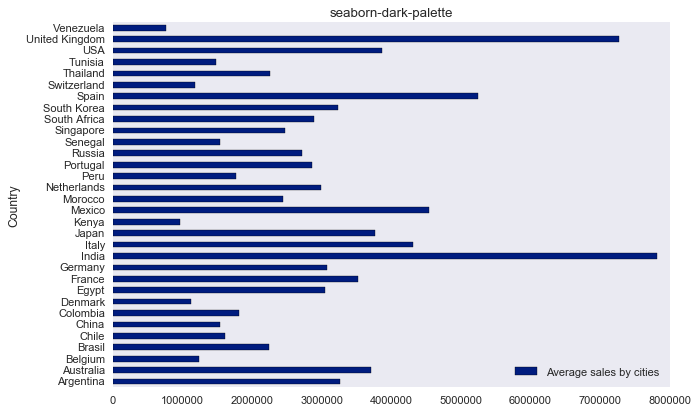

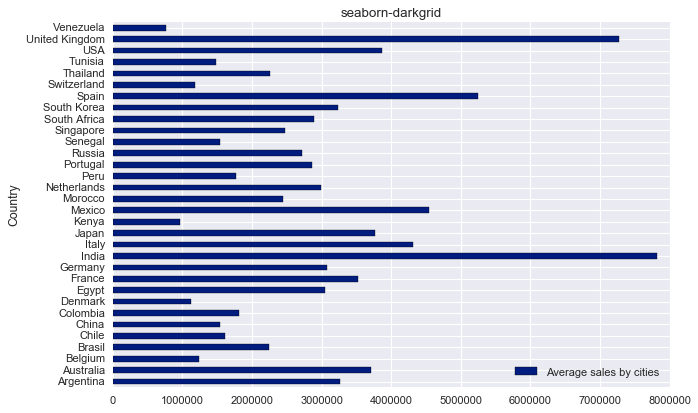

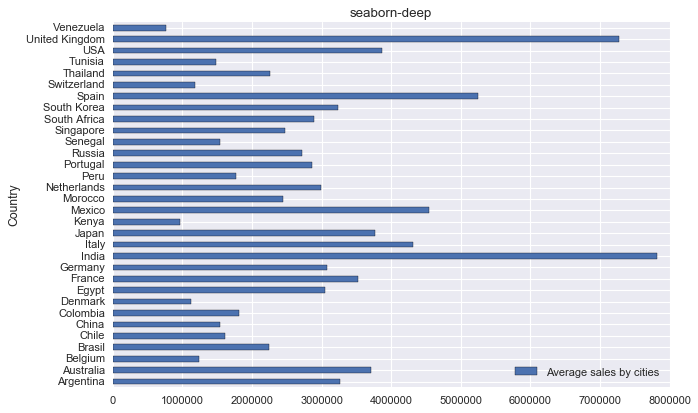

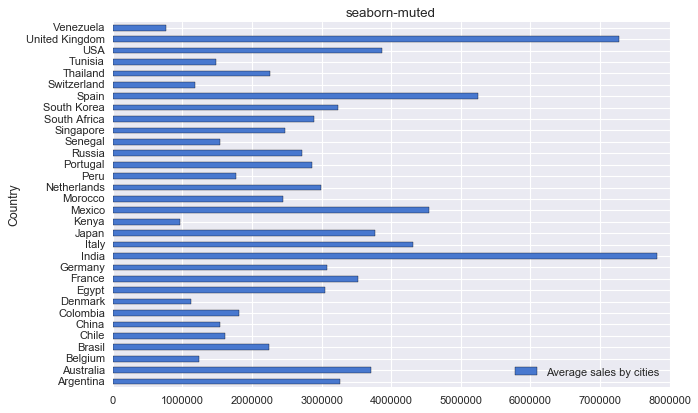

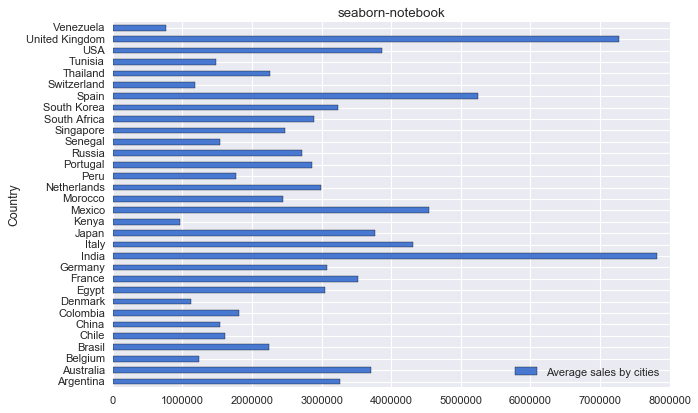

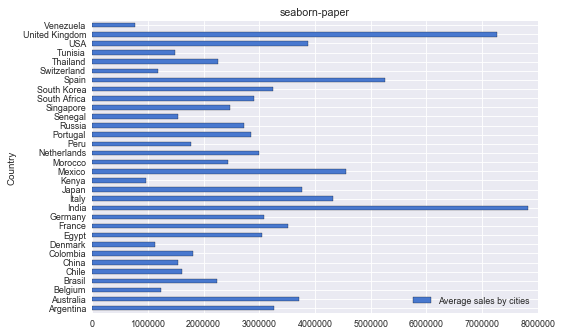

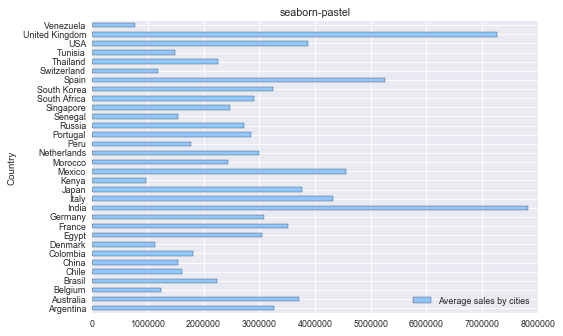

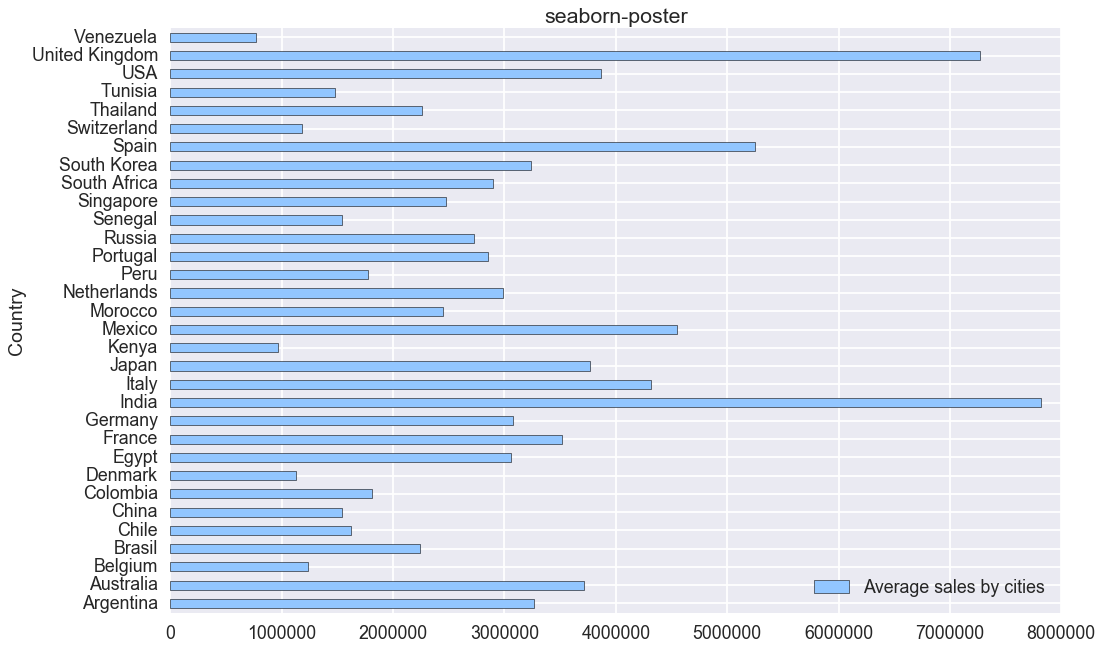

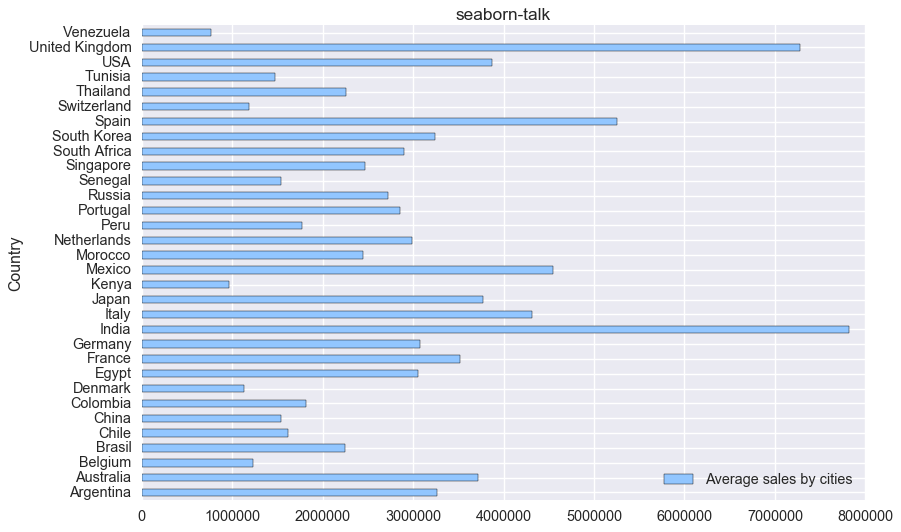

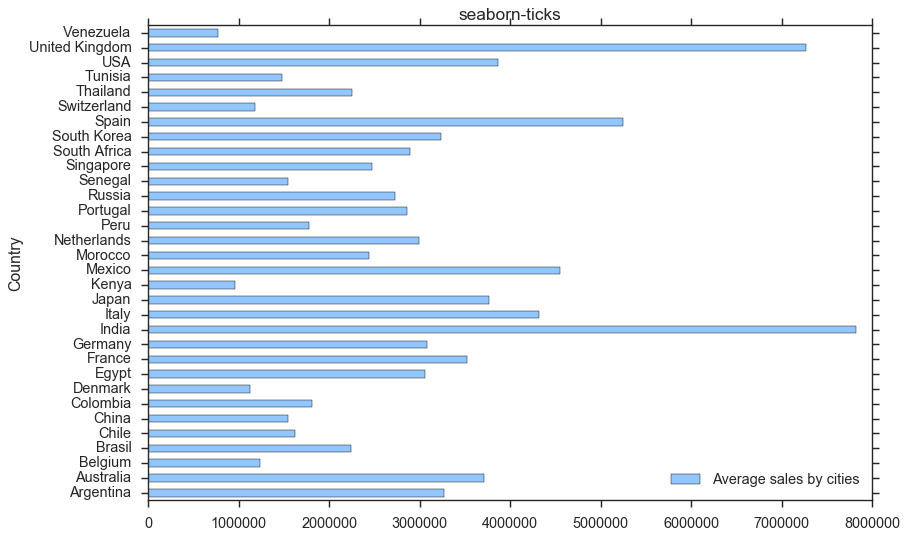

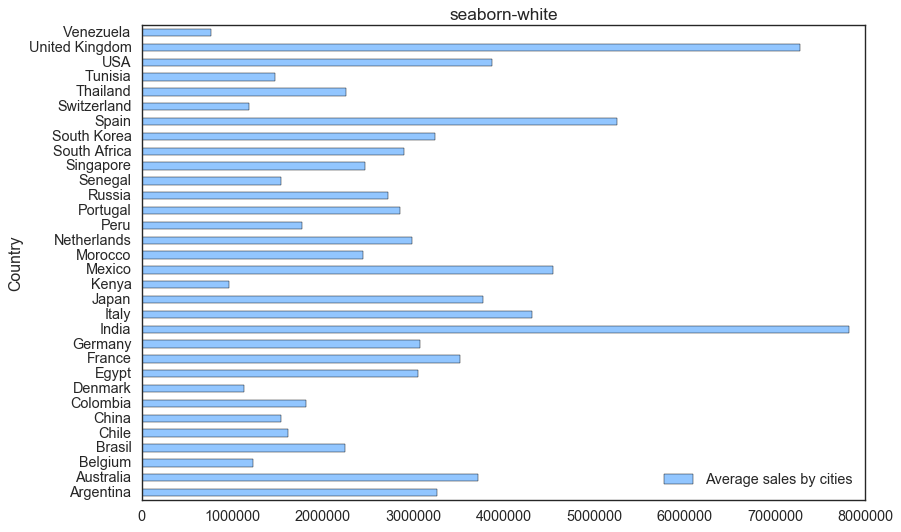

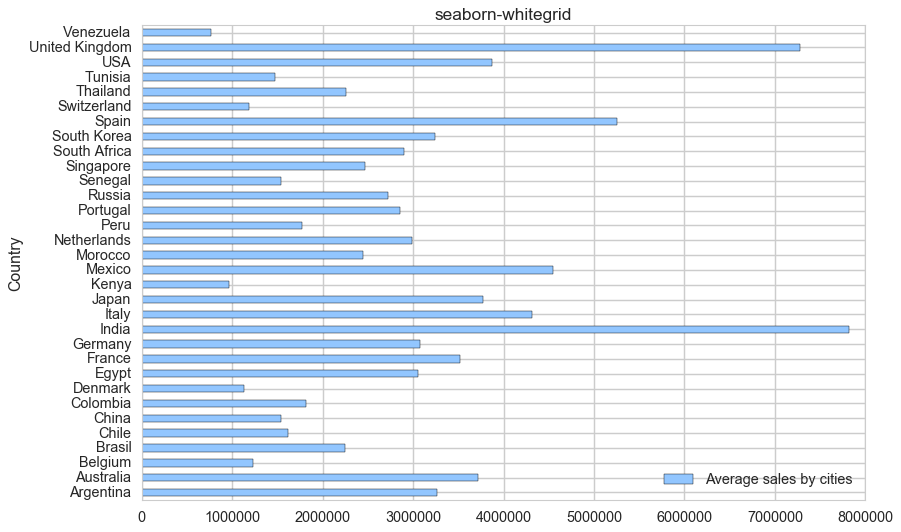

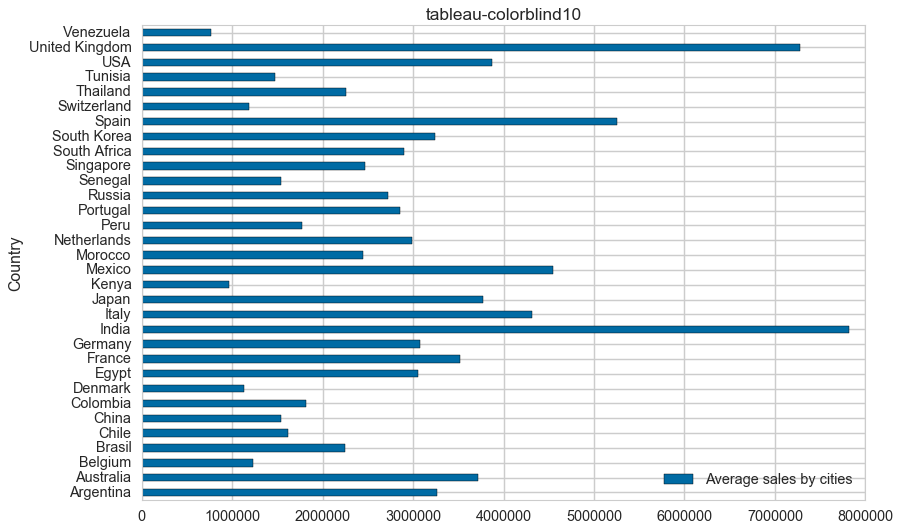

In [30]:
for style in plt.style.available:
    
    matplotlib.style.use(style)
    df6.plot(x= "Country", y= "Average sales by cities", kind="barh", legend=True, title=style)
 

### Beware NULL behavior

In [31]:
df_null = pd.DataFrame({"Person":
                   ["John", "Myla", "Lewis", "John", "Myla"],
                   "Age": [24., np.nan, 21., 33, 26],
                   "Single": [False, True, True, True, False]})

df_null

,Person,Age,Single
0,John,24.0,False
1,Myla,NaN,True
2,Lewis,21.0,True
3,John,33.0,True
4,Myla,26.0,False


In [32]:
print(np.nan == np.nan)
print(np.isnan(np.nan))

False
True


In [33]:
df_null.isna()

,Person,Age,Single
0,False,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,False,False


In [34]:
df_null.count()

Person    5
Age       4
Single    5
dtype: int64

In [35]:
df_null.nunique()

Person    3
Age       4
Single    2
dtype: int64

In [36]:
# df_null2 =df_null.copy()
# df_null2["Rank"] =df_null2["Age"].rank(method='min', ascending=False)
# df_null2.sort_values("Rank")

na_option{‘keep’, ‘top’, ‘bottom’}, default ‘keep’

How to rank NaN values:
- keep: assign NaN rank to NaN values
- top: assign lowest rank to NaN values
- bottom: assign highest rank to NaN values


In [37]:
# df_null2 =df_null.copy()
# df_null2["Rank"] =df_null2["Age"].rank(method='min', ascending=False, na_option="bottom")
# df_null2.sort_values("Rank")

## would be nice to have some kind of order...

<AxesSubplot:title={'center':'tableau-colorblind10'}, ylabel='Country'>

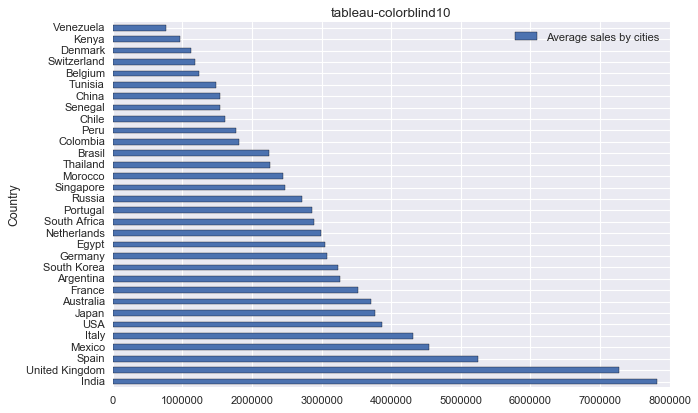

In [38]:
matplotlib.style.use("seaborn")
df6.sort_values("Average sales by cities", ascending=False).plot(x= "Country", y= "Average sales by cities", kind="barh", legend=True, title=style)

# Rank countries by number of cities

In [39]:
df6.head()

,Country,City,Sales Revenue,Average sales by cities
0,Argentina,1,3268926.0,3268926.0
1,Australia,2,7429334.0,3714667.0
2,Belgium,1,1236306.0,1236306.0
3,Brasil,2,4488046.0,2244023.0
4,Chile,1,1619937.0,1619937.0


In [40]:
df7 =df6.copy()
df7["Rank"] =df7["City"].rank(method='min', ascending=False)
df7.sort_values("Rank")

,Country,City,Sales Revenue,Average sales by cities,Rank
29,USA,9,34820095.00,3.868899e+06,1.0
9,France,4,14076212.51,3.519053e+06,2.0
23,South Africa,4,11583947.00,2.895987e+06,2.0
1,Australia,2,7429334.00,3.714667e+06,4.0
3,Brasil,2,4488046.00,2.244023e+06,4.0
30,United Kingdom,2,14546731.00,7.273366e+06,4.0
25,Spain,2,10503512.00,5.251756e+06,4.0
8,Egypt,2,6110953.00,3.055476e+06,4.0
10,Germany,2,6156448.00,3.078224e+06,4.0
11,India,2,15634785.00,7.817392e+06,4.0


method{‘average’, ‘min’, ‘max’, ‘first’, ‘dense’}, default ‘average’

How to rank the group of records that have the same value (i.e. ties):
- average: average rank of the group
- min: lowest rank in the group
- max: highest rank in the group
- first: ranks assigned in order they appear in the array
- dense: like ‘min’, but rank always increases by 1 between groups.



In [41]:
df7["Rank"] =df7["City"].rank(method='max', ascending=False)
df7.sort_values("Rank")

,Country,City,Sales Revenue,Average sales by cities,Rank
29,USA,9,34820095.00,3.868899e+06,1.0
9,France,4,14076212.51,3.519053e+06,3.0
23,South Africa,4,11583947.00,2.895987e+06,3.0
1,Australia,2,7429334.00,3.714667e+06,12.0
3,Brasil,2,4488046.00,2.244023e+06,12.0
30,United Kingdom,2,14546731.00,7.273366e+06,12.0
25,Spain,2,10503512.00,5.251756e+06,12.0
8,Egypt,2,6110953.00,3.055476e+06,12.0
10,Germany,2,6156448.00,3.078224e+06,12.0
11,India,2,15634785.00,7.817392e+06,12.0


### Rank and NULL

In [42]:
df_null2 =df_null.copy()
df_null2["Rank"] =df_null2["Age"].rank(method='min', ascending=False, na_option='keep')
df_null2.sort_values("Rank")

,Person,Age,Single,Rank
3,John,33.0,True,1.0
4,Myla,26.0,False,2.0
0,John,24.0,False,3.0
2,Lewis,21.0,True,4.0
1,Myla,NaN,True,NaN


na_option{‘keep’, ‘top’, ‘bottom’}, default ‘keep’

How to rank NaN values:

- keep: assign NaN rank to NaN values
- top: assign lowest rank to NaN values
- bottom: assign highest rank to NaN values

## Ok what are the top best countries?

In [43]:
aggregations = { 
                "Quantity sold": "sum",
                "Sales Revenue": "sum",
                "Gross Margin" : "sum"
}

df8 = df.groupby(['Country'], as_index=False).agg(aggregations)

df8["Quantity Rank"] =df8["Quantity sold"].rank(method='min', ascending=False)
df8["Sales Rank"] =df8["Sales Revenue"].rank(method='min', ascending=False)
df8["Margin Rank"] =df8["Gross Margin"].rank(method='min', ascending=False)
df8.sort_values("Sales Rank")

,Country,Quantity sold,Sales Revenue,Gross Margin,Quantity Rank,Sales Rank,Margin Rank
29,USA,10136750.0,34820095.00,13943049.59,1.0,1.0,1.0
11,India,4766350.0,15634785.00,6491187.78,2.0,2.0,2.0
30,United Kingdom,4498200.0,14546731.00,5966329.76,3.0,3.0,3.0
9,France,4084678.0,14076212.51,5824932.35,4.0,4.0,4.0
23,South Africa,3559800.0,11583947.00,4789666.53,5.0,5.0,5.0
25,Spain,3221450.0,10503512.00,4314103.93,6.0,6.0,6.0
12,Italy,2689850.0,8639858.00,3518383.56,7.0,7.0,7.0
13,Japan,2281050.0,7537842.00,3129040.92,9.0,8.0,8.0
1,Australia,2329700.0,7429334.00,2969784.26,8.0,9.0,9.0
10,Germany,1926600.0,6156448.00,2476560.17,10.0,10.0,11.0


## Lookups 

get data about country population for example from: https://data.worldbank.org/indicator/SP.POP.TOTL and add a column to previous dataset (df8) with country population

In [44]:
population = pd.read_excel("Population.xlsx", skiprows=3)
print(population.shape)
population.head()

(266, 65)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [45]:
population[["Country Name", "2020"]]

,Country Name,2020
0,Aruba,106766.0
1,Africa Eastern and Southern,677243299.0
2,Afghanistan,38928341.0
3,Africa Western and Central,458803476.0
4,Angola,32866268.0
...,...,...
261,Kosovo,1775378.0
262,"Yemen, Rep.",29825968.0
263,South Africa,59308690.0
264,Zambia,18383956.0


In [46]:
population[["Country Name", "2020"]].sort_values("2020")

,Country Name,2020
179,Nauru,1.083400e+04
245,Tuvalu,1.179200e+04
188,Palau,1.809200e+04
255,British Virgin Islands,3.023700e+04
84,Gibraltar,3.369100e+04
...,...,...
140,Low & middle income,6.518254e+09
103,IDA & IBRD total,6.570992e+09
259,World,7.761620e+09
69,Eritrea,NaN


In [47]:
df8.merge(population[["Country Name", "2020"]], how="left", left_on='Country', right_on='Country Name')

,Country,Quantity sold,Sales Revenue,Gross Margin,Quantity Rank,Sales Rank,Margin Rank,Country Name,2020
0,Argentina,992900.0,3268926.00,1362987.10,15.0,14.0,14.0,Argentina,4.537676e+07
1,Australia,2329700.0,7429334.00,2969784.26,8.0,9.0,9.0,Australia,2.568704e+07
2,Belgium,390400.0,1236306.00,495686.34,28.0,28.0,28.0,Belgium,1.155600e+07
3,Brasil,1395000.0,4488046.00,1821158.96,13.0,13.0,13.0,NaN,NaN
4,Chile,518400.0,1619937.00,655782.38,24.0,24.0,24.0,Chile,1.911621e+07
5,China,464200.0,1540517.00,633170.64,27.0,26.0,25.0,China,1.410929e+09
6,Colombia,545500.0,1813740.00,764563.70,23.0,22.0,22.0,Colombia,5.088288e+07
7,Denmark,344150.0,1127633.00,476048.24,30.0,30.0,29.0,Denmark,5.831404e+06
8,Egypt,1886150.0,6110953.00,2523291.02,11.0,11.0,10.0,NaN,NaN
9,France,4084678.0,14076212.51,5824932.35,4.0,4.0,4.0,France,6.739158e+07


Note: Brasil != Brazil
so we would need to make additional data cleansing or make somekind of fuzzy join